# Loading Data..

In [10]:
import pandas as pd

speech = pd.read_csv('4.csv')
emotiono = pd.read_csv('emotion.csv')
gaze = pd.read_csv('gaze.csv')


# Analyzing the Speech Dataset


## Descriptive Statistics

The Three most Dominant emotions are:
positive:  0.66
confident:  0.62
hesitant:  0.57


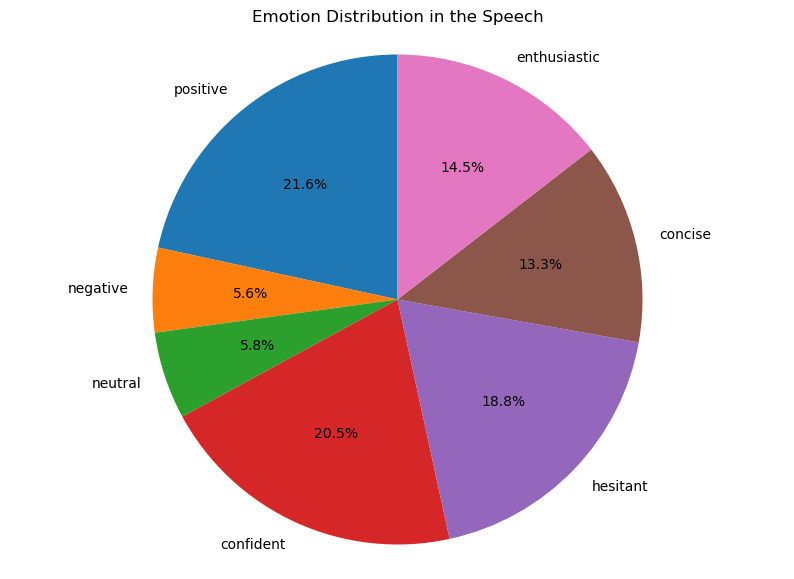

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

emotions = speech.columns[10:-1]
avg = speech[emotions].mean()

top3 = avg.sort_values(ascending = False).head(3)
print('The Three most Dominant emotions are:')
for emo , val in top3.items():
    print(f"{emo}: {val: .2f}")
    

plt.figure(figsize = (10 , 7))
plt.pie(avg , labels = avg.index , autopct ='%1.1f%%' , startangle = 90)
plt.title('Emotion Distribution in the Speech')
plt.axis('equal')
plt.show()

We can see the Three most dominant emotions depicted by the person.

## Trend Analysis

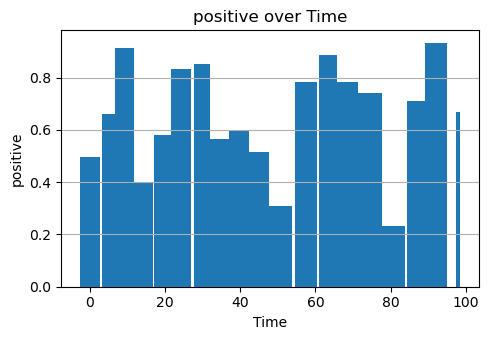

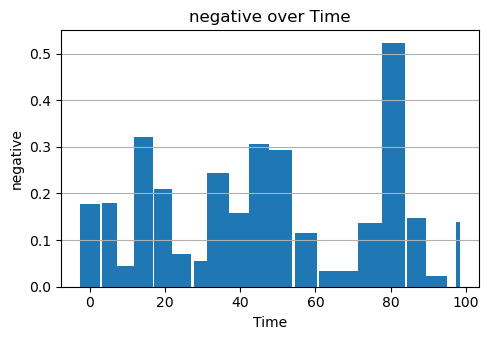

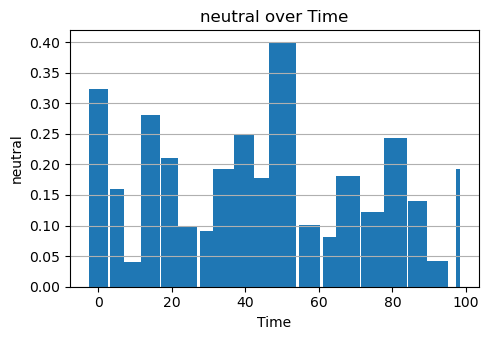

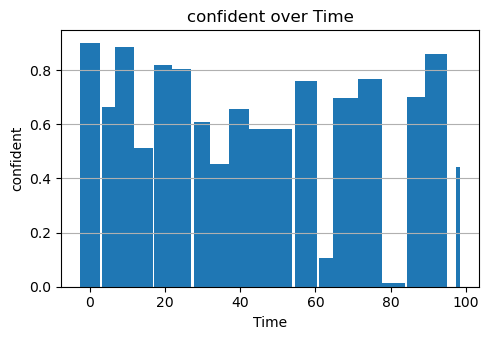

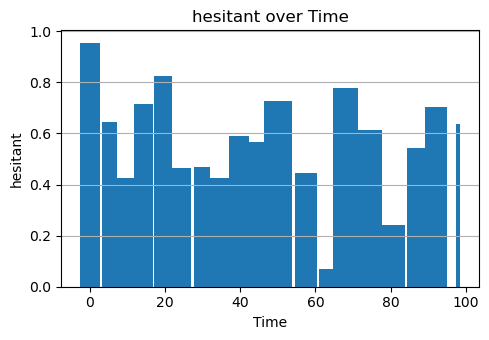

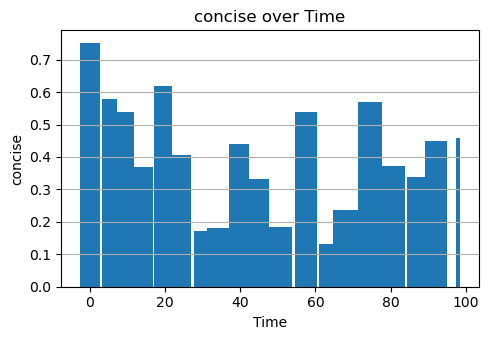

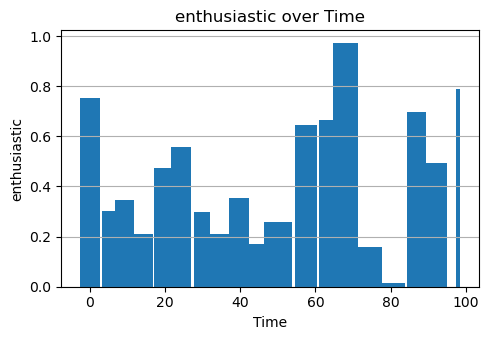

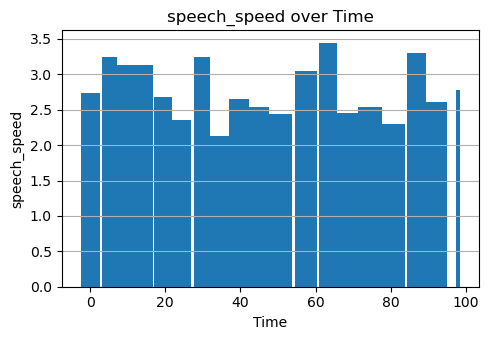

In [3]:

columns = speech.columns[10:]
for column in columns :
    plt.figure(figsize = (5 , 3.5))
    plt.bar(speech['start'] , speech[column] , width = (speech['end'] - speech['start']))
    
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(axis = 'y')
    plt.tight_layout()
    plt.show()

INFERENCES BASED ON THE ABOVE GRAPHS:

1. The tone is generally positive, except when discussing his unwavering commitment to seizing every opportunity and his dedication to improving areas of weakness.

2. The individual exudes confidence throughout the discourse, except when addressing their personal strengths of resilience and seizing every opportunity.

3. High values of hesistant emotions are observed throughout the hesitant graph.

4. The speaker is generally less concise with even lower values of conciseness observed when talking about academics and the courses he took to learn different skill set.

5. Less conciseness is also observed when the person talks about his Position of Responsibilities in school and NGO's.

6. The person as overall sounds less enthusiastic except when he talks about his interpersonal skills and hobbies


## Correlation Analysis

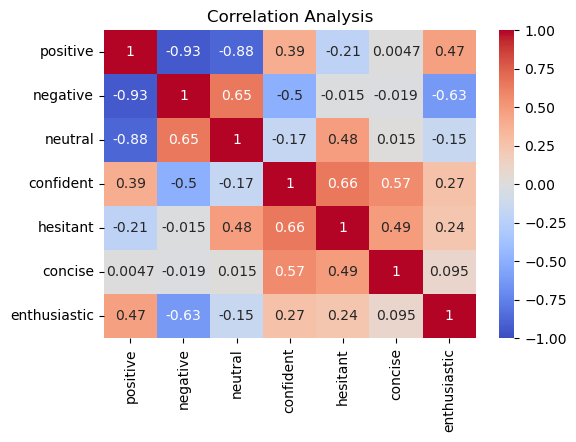

In [5]:
import seaborn as sns
selected = speech.columns[10:-1]
df = speech[selected]
corr = df.corr()

plt.figure(figsize = (6 , 4))
sns.heatmap(corr , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
plt.title("Correlation Analysis")
plt.show()

This heat map gives the correlation between emotions where strong correalations are generally (> 0.75 or < -0.75) and these strong correlations can be used to make inferences

# Analyzing the Emotion Dataset

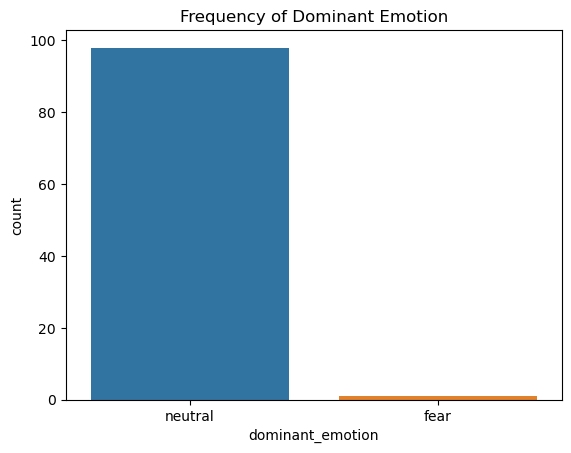

The most dominant emotion is 'neutral' with a count of 98.


In [6]:
sns.countplot(data = emotiono , x = 'dominant_emotion')
plt.title('Frequency of Dominant Emotion')
plt.show()

emotion_counts = emotiono['dominant_emotion'].value_counts()
max_emotion = emotion_counts.idxmax()
max_count = emotion_counts.max()

print(f"The most dominant emotion is '{max_emotion}' with a count of {max_count}.")

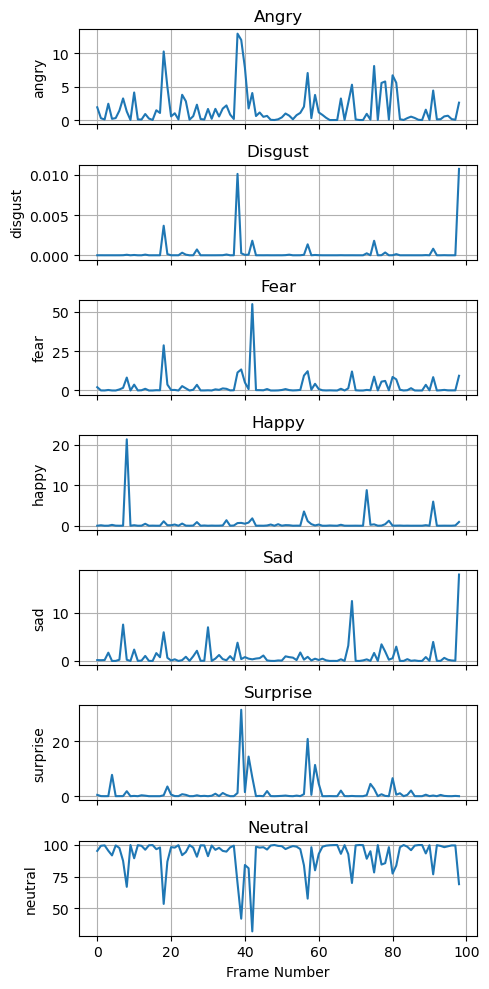

In [7]:
emotion_columns = emotiono.columns[2:-1]
fig, axes = plt.subplots(nrows=len(emotion_columns), figsize=(5 , 10), sharex=True)

x_range = range(len(emotiono))

for ax, emotion_col in zip(axes, emotion_columns):
    ax.plot(x_range, emotiono[emotion_col], label=emotion_col)
    ax.set_ylabel(emotion_col)
    ax.grid(True)
    ax.set_title(emotion_col.capitalize())

plt.xlabel('Frame Number')
plt.tight_layout()
plt.show()

As observed from the graph the majority of neutral emotion indicates that the speaker speaks factual information throughout without showing any major changes in emotions.

## Analyzing the Gaze Dataset


In [8]:
print(f"Percentage of frames with eye contact: {gaze['gaze'].mean() * 100:.2f}%")
print(f"Percentage of frames with blinks: {gaze['blink'].mean() * 100:.2f}%")

Percentage of frames with eye contact: 78.79%
Percentage of frames with blinks: 21.21%


Given that the speaker maintains eye contact in 78.79% of the frames, it shows a strong level of confidence and direct engagement with the audience. However, the 22% blink rate is slightly higher, suggesting possible moments of intense concentration or brief instances of stress. Overall, the speaker seems assured, but the elevated blink rate might hint at underlying nerves or contemplation

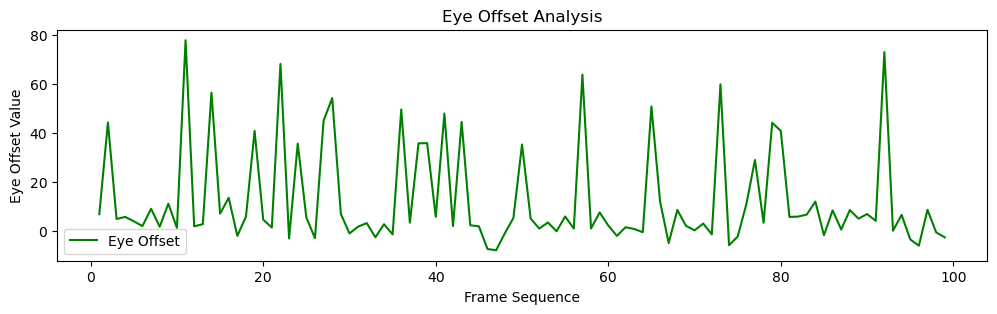

In [9]:
plt.figure(figsize=(12,3))
plt.plot(gaze['image_seq'], gaze['eye_offset'], label='Eye Offset', color='green')
plt.xlabel('Frame Sequence')
plt.ylabel('Eye Offset Value')
plt.title('Eye Offset Analysis')
plt.legend()
plt.show()

The infrequent peaks in the eye_offset graph suggest that the candidate predominantly maintains consistent eye contact throughout the video. These occasional deviations could indicate brief moments of referencing materials, contemplation, or addressing specific points. The overall pattern indicates a well-prepared and focused presentation, with only occasional distractions or need for external cues.

# Overall Summary

Person3's speech leans positive and confident, but hints of hesitancy emerge, especially when discussing seizing opportunities and personal weaknesses. He often digresses when discussing academics and leadership roles, with only occasional enthusiasm. A dominant 'neutral' tone suggests a fact-focused approach. Maintaining eye contact 78.79% of the time indicates confidence, but a 22% blink rate hints at sporadic stress. Overall, his steady gaze suggests a prepared delivery with minimal distractions